In [2]:
import numpy as np
#import modin.pandas as mipd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [5]:
time_resolution = 1

df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("../result_csv/mix_overlaps"+str(time_resolution)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [6]:
len(df_tech_overlaps.index)

65

In [9]:
df_tech_overlaps

,Kitty,Tika,Lucene.NET,Pivot,Slider,Streams,Gossip,Unomi,ODF Toolkit,Tephra,...,Wicket,Geode,WebWork 2,Ignite,Crunch,CommonsRDF,Directory,Kabuki,Concerted,Traffic Server
0,1.000000,1.000000,1.000000,0.594595,0.218182,1.000000,0.000000,0.0,1.000000,0.0,...,0.0,0.000000,1.000000,0.000000,0.846154,1.0,0.0,0.0,1.000000,0.0
1,0.500000,0.000000,0.100000,0.344444,0.227273,0.000000,0.263158,0.0,0.584507,0.0,...,0.0,0.000000,0.208163,0.000000,0.500000,0.0,0.0,-1.0,0.571429,0.0
2,0.000000,0.000000,0.227642,0.640741,0.345679,0.136364,0.000000,0.0,0.000000,0.0,...,-1.0,0.185185,0.030303,0.000000,0.082645,-1.0,-1.0,-1.0,0.000000,-1.0
3,0.333333,0.000000,0.341463,0.460000,0.354497,0.454545,0.000000,1.0,0.755556,0.0,...,-1.0,0.236220,0.127983,0.086207,0.165289,-1.0,-1.0,-1.0,-1.000000,-1.0
4,0.600000,0.571429,0.520000,0.392000,0.317460,0.000000,0.538462,0.0,0.200000,0.0,...,-1.0,0.259843,0.000000,0.000000,0.040816,-1.0,-1.0,-1.0,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0
61,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0
62,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0
63,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0


In [7]:
def remove_minus(list):
    while -1.0 in list :
        list.remove(-1.0)
    return list

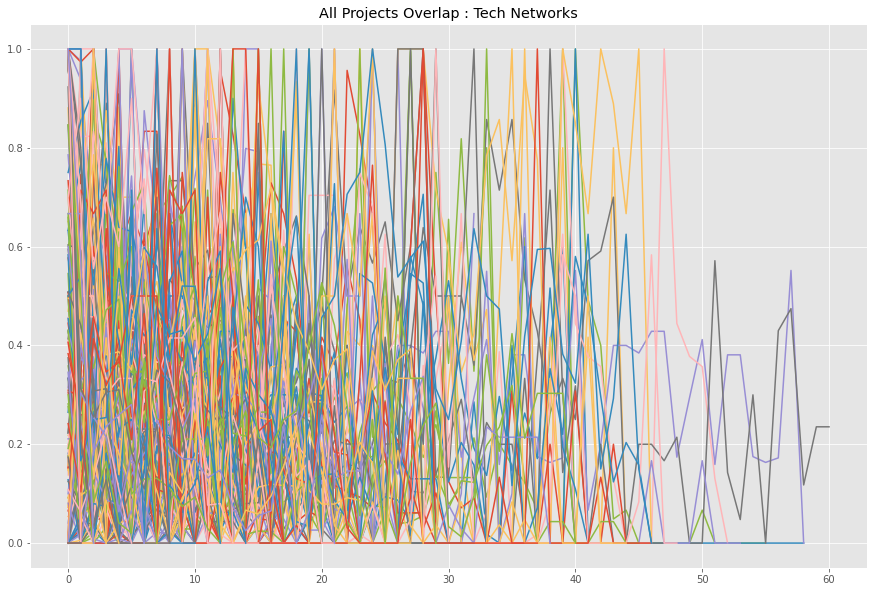

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for col in df_tech_overlaps.columns:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
    #print(data[:i])

    x = range(len(data[:i]))

    plt.plot(x,data[:i])
    plt.title("All Projects Overlap : Tech Networks")
    

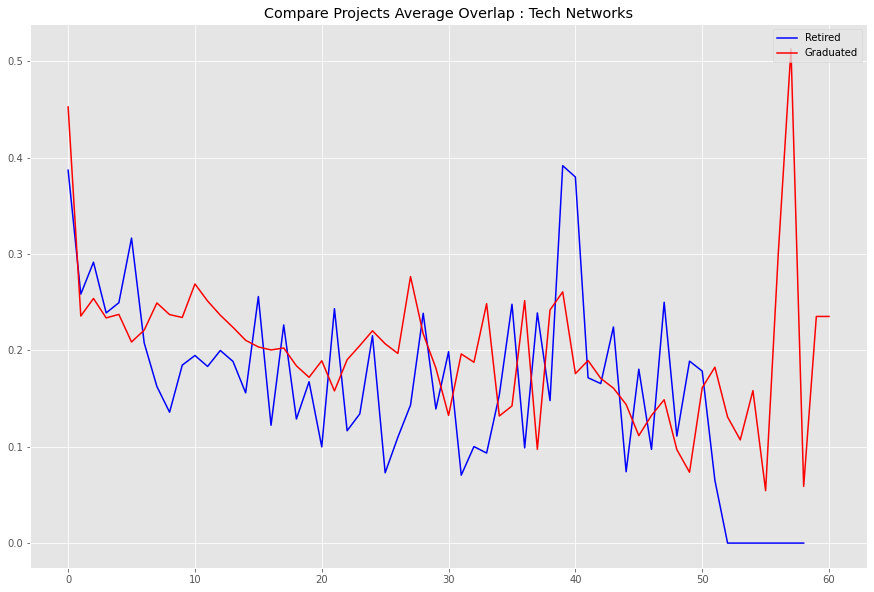

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_retired:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")


ave = [0 for i in range(len(df_tech_overlaps.index))]
count = [0 for i in range(len(df_tech_overlaps.index))]

for col in all_graduated:
    data = df_tech_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Tech Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

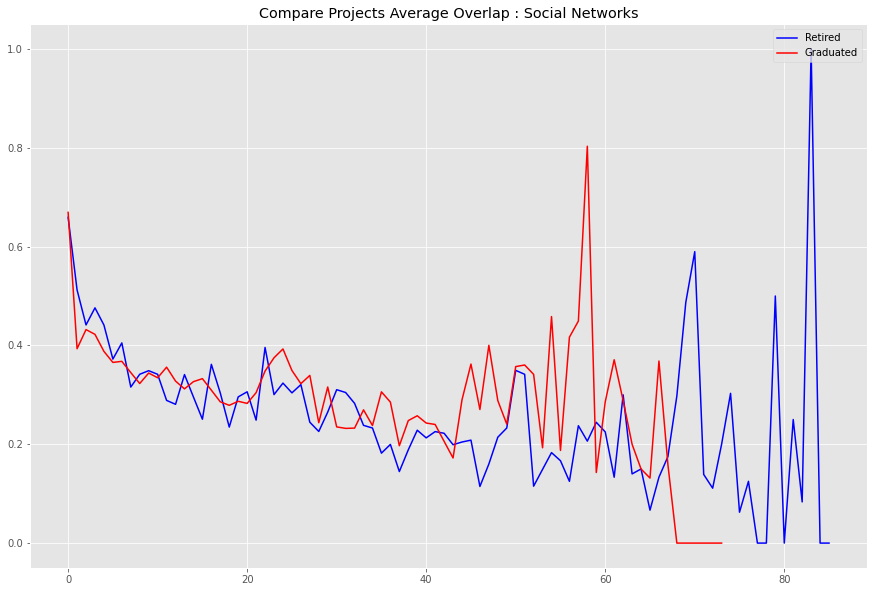

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in all_retired:
    if col not in df_social_overlaps.columns:
        continue
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(ave)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d1 = ave[:i]

plt.plot(x,d1,color = 'b', label = "Retired")



ave = [0 for i in range(len(df_social_overlaps.index))]
count = [0 for i in range(len(df_social_overlaps.index))]

for col in all_graduated:
    data = df_social_overlaps[col].values.tolist()
    flag = False
    for i in range(len(data)):
        if data[i]==-1.0 :
            break
        ave [i]+= data[i]
        count[i]+=1
for i in range(len(ave)):
    if count[i]==0:
        break
    ave[i] = ave[i]/count[i]
    #print(data[:i])

x = range(len(ave[:i]))
d2 = ave[:i]
plt.plot(x,d2,color = 'r', label = 'Graduated')
plt.title("Compare Projects Average Overlap : Social Networks")

#print(ave)
#print(count)
#plt.bar(x,np.array(count[:i])/len(all_graduated)/10, fc='b', alpha=0.3)
plt.legend(loc='upper right')

In [15]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []
labels_time = range(0,36)
for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
labels_time = range(0,36)
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].values.tolist()
    data_thistime = remove_minus(data_thistime)
    datas_t_retired.append(data_thistime)


df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : Tech Networks")

range(0, 36)


<Figure size 1080x720 with 0 Axes>

In [16]:
df.head(10)

,Time,Graduated,Retired
0,0,"[0.0, 0.3160919540229885, 1.0, 1.0, 0.0, 0.428...","[0.5, 0.1666666666666666, 1.0, 0.4067796610169..."
1,1,"[0.0, 0.3333333333333333, 0.0, 0.0740740740740...","[0.0588235294117647, 1.0, 0.8225806451612904, ..."
2,2,"[0.2741935483870967, 0.3555555555555555, 0.133...","[0.2142857142857142, 1.0, 0.8235294117647058, ..."
3,3,"[0.3502304147465437, 0.3492769744160178, 0.066...","[0.2142857142857142, 0.0, 0.0833333333333333, ..."
4,4,"[0.1224018475750577, 0.3251533742331288, 0.0, ...","[0.1666666666666666, 0.0, 0.6666666666666666, ..."
5,5,"[0.1534391534391534, 0.3226495726495726, 0.086...","[0.0, 0.0, 0.4305555555555556, 0.0, 0.0, 0.337..."
6,6,"[0.1363636363636363, 0.3205128205128205, 0.444...","[0.0, 0.0, 0.4285714285714285, 0.0, 0.07894736..."
7,7,"[0.2329545454545454, 0.1669595782073813, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2666666666666..."
8,8,"[0.15625, 0.2662538699690402, 0.0, 0.1, 0.0172...","[0.03125, 0.0, 0.0, 0.0, 0.2954545454545454, 0..."
9,9,"[0.1298701298701298, 0.2879256965944272, 0.0, ...","[0.0, 0.0, 0.0909090909090909, 0.0, 0.25373134..."


In [32]:
from scipy.stats import mannwhitneyu

utest = []
pvalue = []
zz = []
for i in range(len(df)):
    uu, pp = mannwhitneyu(df['Graduated'].values[i],df['Retired'].values[i], alternative= 'greater', method= 'asymptotic')
    utest.append(uu)
    pvalue.append(pp)


In [33]:
pvalue

[0.13460550516257064,
 0.43759936535865546,
 0.438766561586862,
 0.12821048110813876,
 0.2692380169430879,
 0.9636369546673269,
 0.1749094443760068,
 0.0005801529436102043,
 0.000214578628513813,
 0.04947955206678123,
 0.009597109071776076,
 0.004960553081695875,
 0.09563318396513737,
 0.057102392987487316,
 0.013904573750596182,
 0.21368301966976544,
 0.010069046677901204,
 0.392500698933492,
 0.006311866160244288,
 0.06658051080496087,
 0.0016646049729988977,
 0.562996972551509,
 0.00721235356638097,
 0.07954389179462468,
 0.22205097316645095,
 0.0026903977855042213,
 0.007646483099223865,
 0.012231866157688587,
 0.20608764945681762,
 0.2211699438407163,
 0.6543359293876184,
 0.04490464172714766,
 0.05460751086446805,
 0.021999485684186987,
 0.3751115051773751,
 0.7285231798976445]

Text(0.5, 1.0, 'P-value for U-test, Graduated group is Larger than Retired Group')

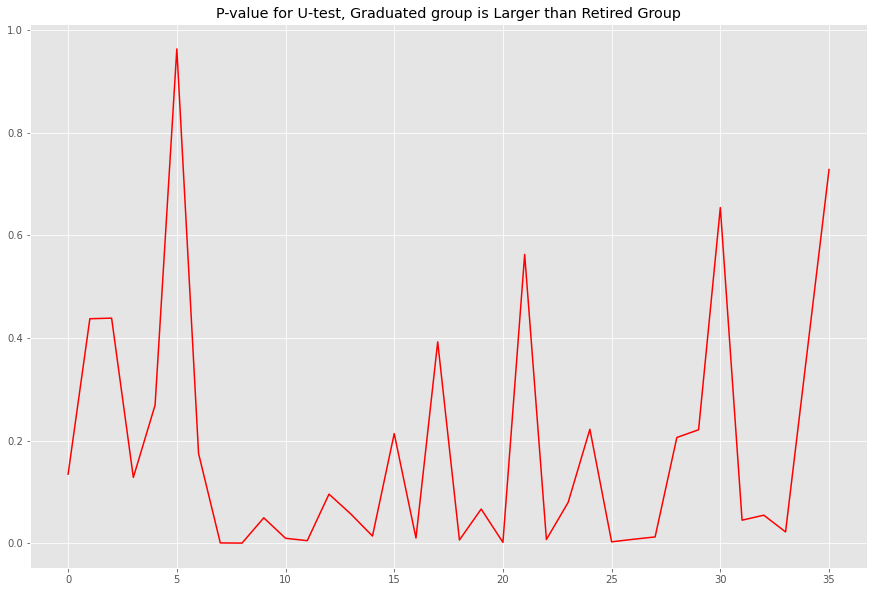

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.plot(labels_time,pvalue,color = 'r', label = 'p-value')
plt.title("P-value for U-test, Graduated group is Larger than Retired Group")